### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Telcom-Customer-Churn-dataset.csv")

### Basic Info

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Clean total charges column

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Drop rows with missing TotalCharges


In [8]:
df.dropna(subset=['TotalCharges'], inplace=True)

### Churn Distribution Plot

C:\Users\SHEIK MOHAMMED SUHEL\AppData\Local\Temp\ipykernel_17312\790158056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


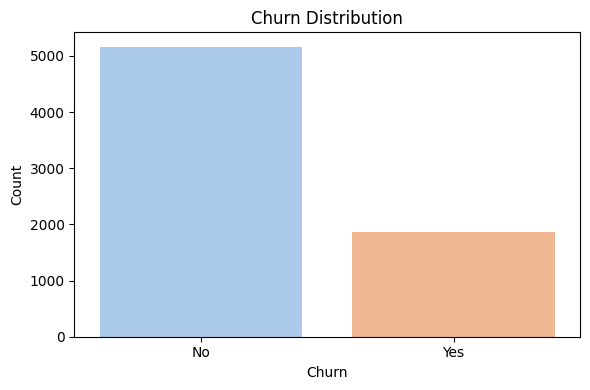

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### encode binary Yes/No to 1/0 for easier modeling

In [10]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

### Target and Features

In [11]:
target = 'Churn'
X = df.drop(['customerID', target], axis=1)
y = df[target]

### Encode Categorical Features

In [12]:
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

### Train/Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Check shapes

In [14]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 19)
Test shape: (1407, 19)


### Train the model

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\SHEIK MOHAMMED SUHEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Predict


In [16]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # for ROC AUC

### Metrics

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

### Print results

In [18]:
print("✅ Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📄 Classification Report:\n", report)
print("🔵 ROC-AUC Score:", roc_auc)

✅ Accuracy: 0.7874911158493249

📊 Confusion Matrix:
 [[923 110]
 [189 185]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

🔵 ROC-AUC Score: 0.8307276972216326


### Plot ROC Curve

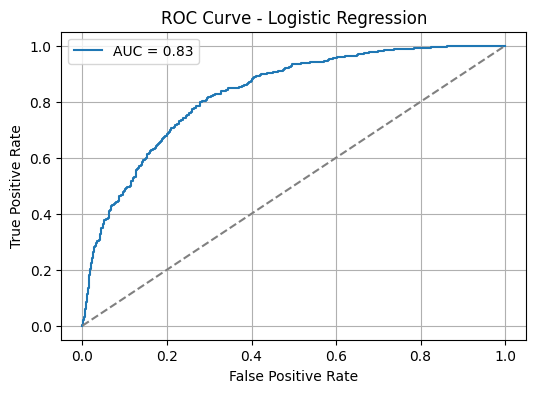

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

### Install & Import SHAP

In [20]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [21]:
import shap

# Initialize SHAP explainer for your model
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for test set
shap_values = explainer(X_test)


###  Global Feature Importance

#### This tells you which features (e.g., Contract, MonthlyCharges, tenure) influence churn predictions the most, and in what direction

### Individual Prediction Explanation

#### This waterfall plot shows how each feature pushes the model toward churn or not churn for that customer.

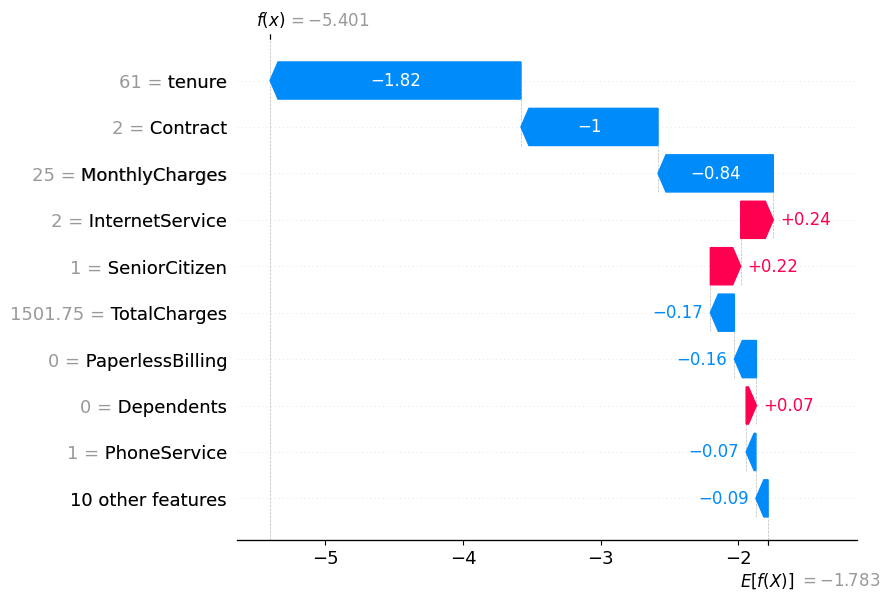

In [22]:
shap.plots.waterfall(shap_values[0])

### SHAP Bar Plot for Easy Reading

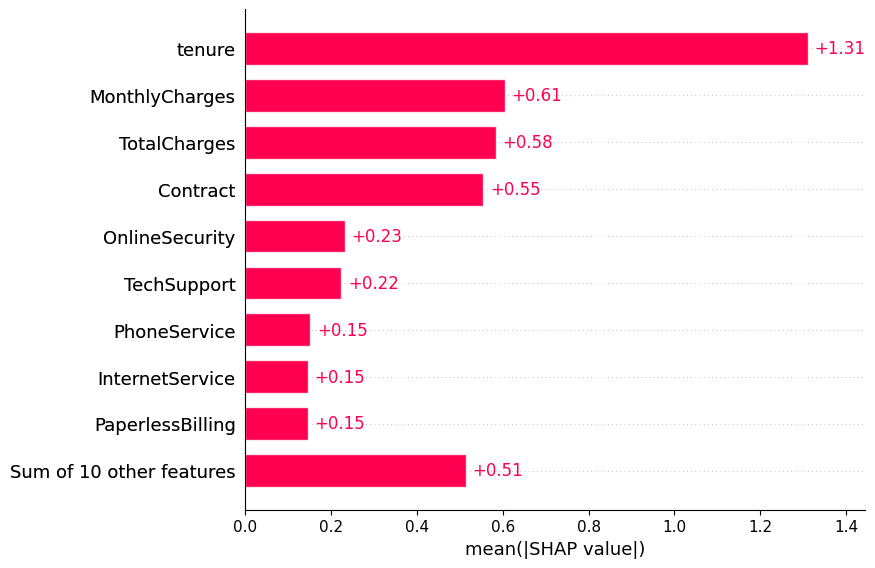

In [23]:
shap.plots.bar(shap_values)

### Customer Segmentation Logic

In [24]:
# Example code (after model.predict_proba)
df_test = X_test.copy()
df_test['churn_prob'] = y_prob
df_test['segment'] = pd.cut(df_test['churn_prob'],
                            bins=[0, 0.3, 0.7, 1],
                            labels=['Loyal', 'At Risk', 'High Risk'])


### Check Value Counts for Each Segment

In [25]:
df_test['segment'].value_counts(normalize=True) * 100


segment
Loyal        60.909737
At Risk      32.977967
High Risk     6.112296
Name: proportion, dtype: float64

### Plot Segment Distribution (Bar Plot)

C:\Users\SHEIK MOHAMMED SUHEL\AppData\Local\Temp\ipykernel_17312\2903479588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test, x='segment', order=['Loyal', 'At Risk', 'High Risk'], palette='coolwarm')


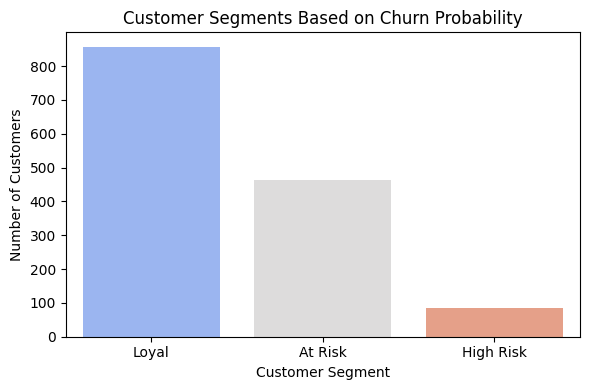

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='segment', order=['Loyal', 'At Risk', 'High Risk'], palette='coolwarm')
plt.title('Customer Segments Based on Churn Probability')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


### Model 2 : Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Model 3 : xgboost

In [28]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))


C:\Users\SHEIK MOHAMMED SUHEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:01:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407



In [29]:
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("xgboost:",accuracy_score(y_test, xgb_pred))

Random Forest Accuracy: 0.7924662402274343
Logistic Regression Accuracy: 0.7874911158493249
xgboost: 0.7640369580668088


In [30]:
# Check churn value counts in training set
print("Before SMOTE:")
print(y_train.value_counts())


Before SMOTE:
Churn
0    4130
1    1495
Name: count, dtype: int64


In [31]:
!pip install imbalanced-learn


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create SMOTE instance
sm = SMOTE(random_state=42)

# Apply to training set ONLY
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())


After SMOTE:
Churn
1    4130
0    4130
Name: count, dtype: int64


In [33]:
# Train Random Forest on resampled data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)

# Predict on original test set
rf_pred_smote = rf_model_smote.predict(X_test)

# Evaluate performance
print("📊 Classification Report (Random Forest + SMOTE):")
print(classification_report(y_test, rf_pred_smote))


📊 Classification Report (Random Forest + SMOTE):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.56      0.57      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



In [34]:
# Predict churn probabilities
y_prob = rf_model_smote.predict_proba(X_test)[:, 1]

# Change threshold (e.g., 0.3 or 0.4)
y_pred_thresh = (y_prob > 0.3).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print("📊 Classification Report (Threshold = 0.3):")
print(classification_report(y_test, y_pred_thresh))


📊 Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.46      0.77      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.72      0.67      1407
weighted avg       0.78      0.70      0.72      1407



In [35]:
import joblib

# Make sure you’re using the final trained model
# (e.g., rf_model_smote with SMOTE applied)
joblib.dump(rf_model_smote, "churn_model.pkl")


['churn_model.pkl']

In [36]:
# Export test features to CSV (no index or target column)
X_test.to_csv("X_test.csv", index=False)


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # for SMOTE
from imblearn.over_sampling import SMOTE

# Define which features are numeric and which are categorical
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# 1️⃣ Preprocessing step
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# 2️⃣ Full pipeline with SMOTE + preprocessing + classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [39]:
from sklearn.metrics import classification_report
import joblib

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the full pipeline
joblib.dump(pipeline, "churn_pipeline.pkl", compress=3)


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



['churn_pipeline.pkl']

In [40]:
# Assuming X_test is part of a train_test_split
X_test.to_csv("X_test_full.csv", index=False)


In [41]:
joblib.dump(pipeline, "churn_pipeline.pkl")


['churn_pipeline.pkl']